##  Speech Singal Recognition  <br>
Gourav Verma<br>
DSC-680 T302<br>
Applied Data Science<br>
Prof Fadi Alsaleem<br>

In [1]:
import librosa
import librosa.display
import IPython
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

## Study a single audio file with librosa

In [2]:
# Read a Female Happy voice with strong emotional intensity
Audio_s1 = 'G:/ML/DSC-680/Project-1/Data/Actor_04/03-01-03-02-02-02-04.wav'
signal, sr = librosa.load(Audio_s1, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)

In [3]:
# PLAY AUDIO FILE

IPython.display.Audio(Audio_s1)

In [4]:
signal.shape

(110250,)

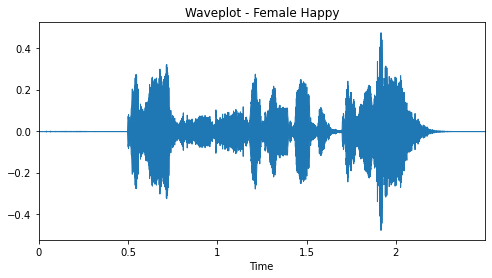

In [5]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(signal, sr=sr)
plt.title('Waveplot - Female Happy')
plt.savefig('Waveplot_Female Happy.png')

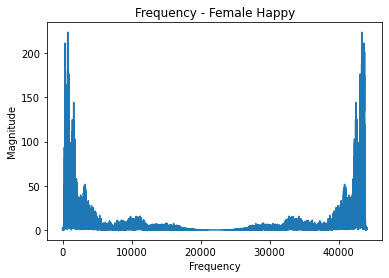

In [6]:
# Plot Frequency spectrum
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
freq = np.linspace(0, sr, len(magnitude))
plt.plot(freq, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title('Frequency - Female Happy')
plt.show()

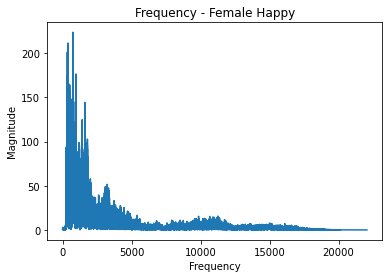

In [7]:
# Plot Frequency spectrum
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
freq = np.linspace(0, sr, len(magnitude))

left_freq = freq[:int(len(freq)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

plt.plot(left_freq, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title('Frequency - Female Happy')
plt.savefig('Frequency_Female Happy.png')
plt.show()

C:\Users\goura\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\goura\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


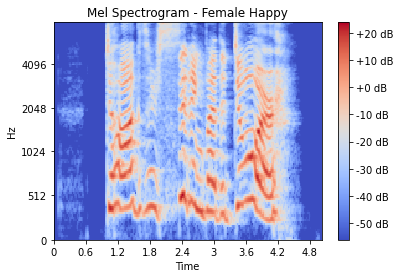

In [8]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=128,fmax=8000) 
spect_mellog = librosa.power_to_db(spectrogram)
librosa.display.specshow(spect_mellog, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Happy')
plt.savefig('MelSpec_Happy.png')
plt.colorbar(format='%+2.0f dB');

In [9]:
# Extract MFCC
mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
mfcc.shape

(13, 216)

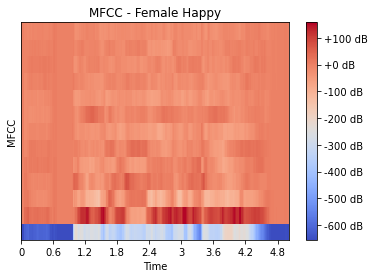

In [10]:
# Visualize MFCC
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.title('MFCC - Female Happy')
plt.savefig('MFCC_Happy.png')
plt.colorbar(format='%+2.0f dB');

## Data Preparation

- Read all the audio files into a dataframe
- Create gender, emotion and actor columns.
- Extract/update values based on file naming convention

In [11]:
path = 'G:/ML/DSC-680/Project-1/Data'
emotion = []
gender = []
actor = []
file_path = []

for subdir, dirs, files in os.walk(path):
    for filenm in files:
        part = filenm.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        gen = int(part[6])
        if gen%2 == 0:
            gen = "female"
        else:
            gen = "male"
        gender.append(gen)
        file_path.append(os.path.join(subdir,filenm))

ravdess_df = pd.DataFrame({'gender':gender, "emotion": emotion, "actor": actor, "path": file_path})

In [12]:
# Update the emotion column
ravdess_df['emotion'] = ravdess_df['emotion'].replace({1:'neural', 2:'calm', 3:'happy', 4:'sad', 
                                                      5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})

# Concat gender and emotion into one column
ravdess_df['label'] = ravdess_df.gender + '_' + ravdess_df.emotion

In [13]:
ravdess_df.head()

,gender,emotion,actor,path,label
0,male,neural,1,G:/ML/DSC-680/Project-1/Data\Actor_01\03-01-01...,male_neural
1,male,neural,1,G:/ML/DSC-680/Project-1/Data\Actor_01\03-01-01...,male_neural
2,male,neural,1,G:/ML/DSC-680/Project-1/Data\Actor_01\03-01-01...,male_neural
3,male,neural,1,G:/ML/DSC-680/Project-1/Data\Actor_01\03-01-01...,male_neural
4,male,calm,1,G:/ML/DSC-680/Project-1/Data\Actor_01\03-01-02...,male_calm


In [14]:
ravdess_df.label.value_counts()

female_calm        96
male_sad           96
male_disgust       96
female_fear        96
female_sad         96
female_happy       96
male_angry         96
female_disgust     96
male_fear          96
female_angry       96
male_happy         96
male_calm          96
female_surprise    96
male_surprise      96
male_neural        48
female_neural      48
Name: label, dtype: int64

## Feature Extraction

Extract **Mel-Frequency Cepstral Coefficient (MFCC)** using librosa's *librosa.feature.mfcc*, for each audio file. Then averaged the MFCC values and loaded into a dataframe.

In [15]:
mfcc_df = pd.DataFrame(columns=['MFCC'])

counter = 0

for path in ravdess_df['path']:
    X, sample_rate = librosa.load(path, res_type='kaiser_fast', duration=2.5,sr=22050*2,offset=0.5)
    mfccX = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
    mfccs = np.mean(mfccX.T,axis=0) 
    
    mfcc_df.loc[counter] = [mfccs]
    counter=counter+1

print(len(mfcc_df))

1440


In [16]:
mfcc_df.head()

,MFCC
0,"[-677.1172, 87.63012, 3.9732518, 15.096436, 8...."
1,"[-664.3512, 89.26903, 0.76504683, 16.066084, 1..."
2,"[-672.8396, 88.77825, 3.1341548, 14.515128, 7...."
3,"[-677.9185, 83.33353, 5.9093657, 16.402319, 7...."
4,"[-691.554, 103.48839, 6.2342052, 18.971476, 8...."


#### Convert MFCC array in mfcc_df to list and add all as seperate columns in ravdess_df

In [17]:
mfcc_df1 = (pd.DataFrame(mfcc_df['MFCC'].values.tolist(), index=mfcc_df.index).rename(columns = lambda x: 'MFCC{}'.format(x+1)))
ravdess_df1 = ravdess_df.join(mfcc_df1)

In [18]:
# Drop unnecessary column
ravdess_df2 = ravdess_df1.drop(['gender', 'emotion', 'actor', 'path'], axis=1)
ravdess_df2

,label,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MFCC31,MFCC32,MFCC33,MFCC34,MFCC35,MFCC36,MFCC37,MFCC38,MFCC39,MFCC40
0,male_neural,-677.117188,87.630119,3.973252,15.096436,8.129905,16.422251,-5.018030,4.110128,-5.980066,...,-0.382024,-4.446791,-1.332099,-0.281551,-1.376313,0.000013,-1.299730,-2.325292,-2.219566,-1.663283
1,male_neural,-664.351196,89.269028,0.765047,16.066084,10.971747,16.490419,-6.770354,5.740640,-7.474891,...,-1.732326,-5.006553,-0.934054,0.114973,-2.365109,-0.332554,-0.643729,-2.910121,-1.812316,-1.668029
2,male_neural,-672.839600,88.778252,3.134155,14.515128,7.485357,12.314556,-5.523108,5.431705,-9.088241,...,-0.352121,-3.812518,-2.186386,-0.592655,-2.136673,-0.378871,-1.535010,-2.313036,-2.388272,-1.888650
3,male_neural,-677.918518,83.333527,5.909366,16.402319,7.702106,14.289433,-3.968400,7.070941,-8.511810,...,-1.010663,-3.942547,-2.104478,-0.962550,-1.669885,0.436042,-1.585016,-2.675743,-2.303841,-2.307729
4,male_calm,-691.554016,103.488388,6.234205,18.971476,8.451644,18.539339,-6.382955,6.202209,-10.171425,...,-1.382834,-5.225513,-0.647115,-0.530049,-2.785005,0.125315,-1.336625,-2.389767,-0.677985,-2.257579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,female_surprise,-556.565613,59.516041,-28.496849,5.159060,-16.654831,-5.326047,-20.261562,-5.718823,-24.243883,...,-3.065751,1.188080,3.169751,4.908093,1.515938,-0.485354,0.294907,-0.551809,2.092705,1.119633
1436,female_surprise,-463.199371,86.390877,-24.556395,3.356815,-23.057022,-7.238044,-29.185778,-5.665481,-19.693480,...,4.063887,3.156573,3.846222,4.494915,2.644870,-0.826345,0.085552,-0.707748,-0.055389,0.404497
1437,female_surprise,-470.399628,80.377190,-34.992916,7.261148,-20.812733,-4.986354,-34.554707,-6.616293,-20.896582,...,0.663609,0.926208,3.389932,3.032537,1.033737,-0.368478,2.354551,0.687790,-0.416411,-0.011800
1438,female_surprise,-426.547882,60.418041,-23.184029,17.513308,-19.811930,2.233463,-21.843550,2.153877,-24.420946,...,3.257730,3.237270,1.020854,0.923441,-0.465715,-0.266603,-0.090818,-0.000881,-0.632005,-1.351143


## Modelling

In [19]:
# Import important libraries
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

#### Create Train-Test split of 75%-25%

In [20]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(ravdess_df2.drop(['label'], axis=1)
                                                    , ravdess_df2.label
                                                    , test_size = 0.25
                                                    , shuffle=True
                                                    , random_state=42)

# Sample test data
X_train[500:505]

,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,...,MFCC31,MFCC32,MFCC33,MFCC34,MFCC35,MFCC36,MFCC37,MFCC38,MFCC39,MFCC40
1407,-650.195557,68.099380,-9.577873,20.227087,-16.789181,4.233767,-17.445364,-0.948663,-12.528038,-7.718449,...,6.963911,6.705306,8.601830,9.825234,5.225109,4.060289,2.271963,-0.501481,0.840225,0.282764
1070,-501.066772,54.090900,-13.867994,4.379436,-14.141437,8.697032,-23.645264,3.681773,-22.041466,-6.669461,...,1.822984,2.446567,3.340581,2.129161,1.067240,0.237218,-0.435089,0.501366,-1.109979,-1.533953
499,-488.811340,97.733490,-7.358917,7.202082,5.077451,15.616577,-10.237720,-5.552570,-7.913505,-15.104179,...,-4.960022,-4.399241,-2.302552,-0.115523,-1.006696,1.376503,5.579568,5.992756,4.297330,5.097509
937,-578.663940,76.290283,-4.537384,13.461999,0.815874,5.296756,-12.062079,-0.435704,-18.109848,-5.982185,...,4.335815,1.434459,-0.072168,0.550177,-0.292606,0.785869,0.999653,0.907036,0.457621,-0.120975
832,-651.159851,69.226143,-6.023440,8.557029,-2.449558,-4.850710,-16.547680,4.278106,-19.561710,2.255266,...,-0.682069,-0.260225,-0.333254,-0.705470,-2.033441,-1.553535,-1.225834,-0.022474,-0.250530,-2.118185


#### Data Normalization

In [21]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

X_train[500:505]

,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,...,MFCC31,MFCC32,MFCC33,MFCC34,MFCC35,MFCC36,MFCC37,MFCC38,MFCC39,MFCC40
1407,-0.958560,-1.009755,0.045848,0.646181,-1.642169,-0.598001,-0.269278,-0.442343,0.205367,-0.275938,...,2.090966,2.084355,2.736231,3.013410,1.647652,1.211653,0.504580,-0.345641,-0.069907,-0.139709
1070,0.477376,-1.798288,-0.233430,-0.891000,-1.344663,-0.102991,-1.045023,0.263332,-1.245186,-0.099493,...,0.548281,0.849279,1.059192,0.475130,0.227764,-0.110617,-0.480133,0.022177,-0.739270,-0.793737
499,0.595382,0.658341,0.190298,-0.617211,0.814810,0.664438,0.632557,-1.143975,0.908965,-1.518254,...,-1.487157,-1.136072,-0.739573,-0.265200,-0.480473,0.283423,1.707748,2.036274,1.116665,1.593625
937,-0.269794,-0.548691,0.373974,-0.010015,0.335970,-0.480107,0.404290,-0.364168,-0.645715,0.016110,...,1.302329,0.555758,-0.028632,-0.045642,-0.236616,0.079143,0.041767,0.170966,-0.201228,-0.285057
832,-0.967845,-0.946329,0.277235,-0.485785,-0.030940,-1.605538,-0.156958,0.354213,-0.867087,1.401690,...,-0.203433,0.064283,-0.111854,-0.459773,-0.831101,-0.729978,-0.767773,-0.169954,-0.444284,-1.004063


#### Data Transformation for Keras

In [22]:
# convert data into arrays

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [23]:
# one-hot encoding the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [24]:
X_train.shape

(1080, 40)

In [25]:
lb.classes_

array(['female_angry', 'female_calm', 'female_disgust', 'female_fear',
       'female_happy', 'female_neural', 'female_sad', 'female_surprise',
       'male_angry', 'male_calm', 'male_disgust', 'male_fear',
       'male_happy', 'male_neural', 'male_sad', 'male_surprise'],
      dtype=object)

### Baseline Model

In [28]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.predict(X_test)
scr = clf.score(X_test, y_test)
print('Achieved ', scr, ' accuracy for baseline model using Decision Tree')

Achieved  0.37222222222222223  accuracy for baseline model using Decision Tree


In [29]:
# Reshape data into 3D tensor

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(1080, 40, 1)

### Build CNN Network

In [30]:
# Create Model
model = Sequential()

# build CNN layers
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))

model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(5)))

model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))

# Flatten the output and feed it into output(dense layer)
model.add(Flatten())
model.add(Dense(16)) # Target class number
model.add(Activation('softmax'))

# Optimization
opt = keras.optimizers.Adam(lr=0.00001, decay=1e-6)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

# Summarize
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 256)           2304      
_________________________________________________________________
activation (Activation)      (None, 40, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40, 256)           524544    
_________________________________________________________________
batch_normalization (BatchNo (None, 40, 256)           1024      
_________________________________________________________________
activation_1 (Activation)    (None, 40, 256)           0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 256)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 256)            0

### Train CNN

In [31]:
# Train the CNN
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
68/68 [==============================] - 4s 44ms/step - loss: 2.8018 - accuracy: 0.0509 - val_loss: 2.7728 - val_accuracy: 0.0306
Epoch 2/100
68/68 [==============================] - 3s 37ms/step - loss: 2.7502 - accuracy: 0.0677 - val_loss: 2.7725 - val_accuracy: 0.0472
Epoch 3/100
68/68 [==============================] - 3s 38ms/step - loss: 2.7320 - accuracy: 0.0693 - val_loss: 2.7714 - val_accuracy: 0.0528
Epoch 4/100
68/68 [==============================] - 3s 38ms/step - loss: 2.7045 - accuracy: 0.1105 - val_loss: 2.7686 - val_accuracy: 0.0528
Epoch 5/100
68/68 [==============================] - 3s 39ms/step - loss: 2.6702 - accuracy: 0.1447 - val_loss: 2.7624 - val_accuracy: 0.0528
Epoch 6/100
68/68 [==============================] - 3s 40ms/step - loss: 2.6615 - accuracy: 0.1486 - val_loss: 2.7471 - val_accuracy: 0.0806
Epoch 7/100
68/68 [==============================] - 3s 39ms/step - loss: 2.6296 - accuracy: 0.1730 - val_loss: 2.7215 - val_accuracy: 0.1083
Epoch 

68/68 [==============================] - 3s 51ms/step - loss: 1.4518 - accuracy: 0.6469 - val_loss: 1.8297 - val_accuracy: 0.5083
Epoch 59/100
68/68 [==============================] - 4s 56ms/step - loss: 1.3831 - accuracy: 0.7007 - val_loss: 1.8087 - val_accuracy: 0.5000
Epoch 60/100
68/68 [==============================] - 4s 53ms/step - loss: 1.3871 - accuracy: 0.6739 - val_loss: 1.7932 - val_accuracy: 0.4972
Epoch 61/100
68/68 [==============================] - 4s 53ms/step - loss: 1.3804 - accuracy: 0.6857 - val_loss: 1.7716 - val_accuracy: 0.5222
Epoch 62/100
68/68 [==============================] - 4s 54ms/step - loss: 1.3520 - accuracy: 0.6933 - val_loss: 1.7638 - val_accuracy: 0.4972
Epoch 63/100
68/68 [==============================] - 5s 70ms/step - loss: 1.3065 - accuracy: 0.7084 - val_loss: 1.7466 - val_accuracy: 0.5333
Epoch 64/100
68/68 [==============================] - 4s 62ms/step - loss: 1.3023 - accuracy: 0.7024 - val_loss: 1.7242 - val_accuracy: 0.5194
Epoch 65/100

### Model Evaluation

In [32]:
# Evaluate the CNN on the test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

12/12 [==============================] - 0s 11ms/step - loss: 1.3613 - accuracy: 0.6000
Accuracy on test set is: 0.6000000238418579


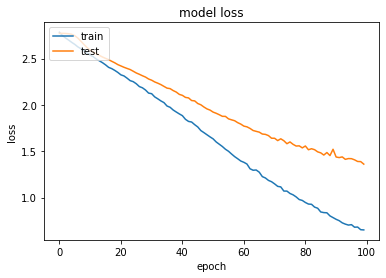

In [33]:
# Plot loss curve
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

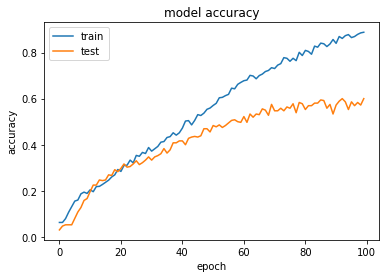

In [34]:
# Plot accuracy curve
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Prediction

In [38]:
preds = model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

23/23 [==============================] - 0s 7ms/step


array([10,  9,  6,  1, 10, 14,  1,  3,  4,  9,  0,  7, 14,  3, 14,  2,  7,
       11,  5,  0,  0,  6,  5, 14,  3, 14, 15, 15, 12, 14, 12,  8, 15, 10,
       15, 14,  2,  8,  3, 15,  1, 14,  1,  8, 15, 14,  1, 14,  3,  3, 14,
        3, 15,  0,  1,  0,  1,  7,  8, 14, 15,  3, 15,  7,  4,  0,  1, 10,
        0, 14,  4,  7,  1,  4, 15, 14,  8,  7, 10,  4, 12,  4,  2,  9,  4,
        8,  3,  1, 12,  1,  6,  1,  0,  2,  1, 10, 10,  8,  0, 15,  2,  3,
        8, 11, 14,  3,  0,  2,  8,  9,  7,  0,  7, 12,  2,  0,  0, 10, 12,
       15,  4,  1,  7, 12, 13,  8,  7, 14,  3,  3, 12,  2,  9, 11,  0, 14,
        1,  9,  0,  2, 12,  0,  4, 12,  8, 14,  0,  9, 14,  3, 11,  4,  1,
       11,  4,  9,  0, 14, 15,  3, 13, 10,  0,  1,  4,  0,  8,  1,  4,  7,
        1,  8,  0,  2,  8,  1, 15,  8, 12,  4,  0,  3,  4,  6,  5, 14,  7,
        0,  0, 14, 10,  3,  6,  1, 14,  6, 15,  7,  2,  1,  4, 14, 14,  6,
        9,  0, 10,  5, 12,  8,  5, 10,  7,  3,  1, 15,  0,  0,  7, 15,  4,
       12,  1,  6, 13,  2

In [39]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[250:260]

,actualvalues,predictedvalues
250,male_angry,male_surprise
251,male_sad,male_sad
252,male_angry,male_angry
253,male_calm,male_calm
254,male_angry,male_angry
255,female_disgust,female_disgust
256,male_sad,male_happy
257,female_surprise,female_surprise
258,female_calm,female_calm
259,male_calm,male_calm


In [40]:
# Write out the predictions to disk
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,44
female_calm,31
female_disgust,21
female_fear,26
female_happy,21
female_neural,7
female_sad,18
female_surprise,29
male_angry,24


In [41]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

0.6


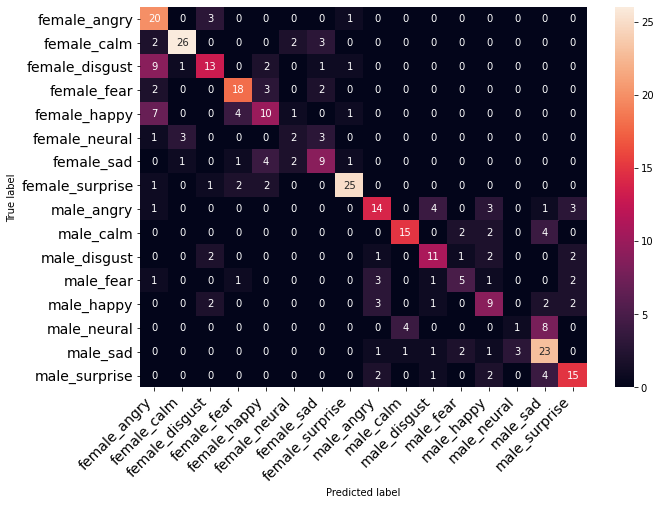

In [42]:
# Get the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)